In [1]:
from pathlib import Path
import datetime as dt

CURR_DIR = Path.cwd()
DATA_DIR = CURR_DIR / 'lab1-data'

#### DISCLAIMER: Graphs and Results provided in this Notebook

## Functions

In [8]:
def csv_parse(file_name):
    
    f = open(DATA_DIR / file_name, mode = 'r', encoding = 'utf-8-sig')
    
    df = {}
    rows = []
    keys = []
    for row in f:
        rows.append(row.replace('"','').strip("'").strip("\n").split(','))
    
    for key in rows[0]:
        keys.append(key)
        
    for i in range(len(keys)):
        if keys[i] == 'DateTime':
            df[keys[i]] = [row[i] for row in rows[1:]]
        else:
            df[keys[i]] = [float(row[i]) for row in rows[1:]]
    
    f.close()
        
    return df

def original_statistics(file_name):
    
    for key in list(file_name.keys())[1:]:
        
        mean = sum(file_name[key]) / len(file_name[key])
        var = sum(pow(i - mean, 2) for i in file_name[key]) / len(file_name[key])
        std = (var)**(1/2)
        
        print(f'\033[1m{key}\033[0m')
        print(f'Mean : {mean}')
        print(f'Standard Deviation : {std}')
        print(f'Minimum : {min(file_name[key])}')
        print(f'Maximum : {max(file_name[key])}')
        print()

def absent_date(file_name):
        
    date_time = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in file_name['DateTime']]
    day_count = (date_time[-1] - date_time[0]).days
    
    all_dates = []
    absent_dates = []
    
    for i in range(day_count + 1):
        all_dates.append(date_time[0] + dt.timedelta(days = i))
    
    for i in range(0, len(all_dates)):
        if (all_dates[i] not in date_time):
            absent_dates.append(all_dates[i])
            
    else:
        pass
    
    return absent_dates

def append_date(file_name):
    
    date_list = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in file_name['DateTime']]
    date_list.extend(absent_date(file_name))
    unsorted_date_list = date_list
    
    for key in list(file_name.keys())[1:]:
        file_name[key].extend([None]*len(absent_date(file_name)))
    
        zip_list = zip(date_list, file_name[key])
        sorted_pairs = sorted(zip_list)
        tuples = zip(*sorted_pairs)
        sorted_date_list, file_name[key] = [list(tuple) for tuple in tuples]
        sorted_date_list = unsorted_date_list
    
    date_list = sorted(unsorted_date_list)
    #date_complete = [dt.datetime.strftime(date, '%Y-%m-%d %H:%M:%S') for date in date_list]
    #file_name['DateTime'] = date_complete
    file_name['DateTime'] = date_list
    return file_name

def duplicate_check(file_name):
    
    if len(file_name['DateTime']) == len(set(file_name['DateTime'])):
        return True
    else:
        return False

def handle_null_data(file_name):
    
    import pandas as pd
    
    df = pd.DataFrame(file_name).set_index('DateTime')
    df.fillna(df.mean(), inplace = True)
    
    return df

def compute_statistic(df):
    
    for col in df.columns:
        print(f'\033[1m{col}\033[0m')
        print(f'Mean : {df[col].mean()}')
        print(f'Standard Deviation : {df[col].std()}')
        print(f'Minimum : {df[col].min()}')
        print(f'Maximum : {df[col].max()}')
        print()

## Script

### Parsing CSV Files

- Naming variables as corresponding file names
- Reading in files as {key:list} pair in dictionary

In [9]:
barometer = csv_parse('barometer-last-year.csv')
indoor_temperature = csv_parse('indoor-temperature-last-year-broken_version.csv')
outside_temperature = csv_parse('outside-temperature-last-year.csv')
rainfall = csv_parse('rainfall-last-year.csv')

ValueError: could not convert string to float: ''

### Inspecting Dictionaries

- determining correct dictionary format to convert to pandas dataframe (e.g. barometer_last_year, indoor_temperature_last_year)
- check for missing values by checking length is not equivalent to 366 days

In [4]:
barometer

{'DateTime': ['2016-10-09 00:00:00',
  '2016-10-10 00:00:00',
  '2016-10-11 00:00:00',
  '2016-10-12 00:00:00',
  '2016-10-13 00:00:00',
  '2016-10-14 00:00:00',
  '2016-10-15 00:00:00',
  '2016-10-16 00:00:00',
  '2016-10-17 00:00:00',
  '2016-10-18 00:00:00',
  '2016-10-19 00:00:00',
  '2016-10-20 00:00:00',
  '2016-10-21 00:00:00',
  '2016-10-22 00:00:00',
  '2016-10-23 00:00:00',
  '2016-10-24 00:00:00',
  '2016-10-25 00:00:00',
  '2016-10-26 00:00:00',
  '2016-10-27 00:00:00',
  '2016-10-28 00:00:00',
  '2016-10-29 00:00:00',
  '2016-10-30 00:00:00',
  '2016-10-31 00:00:00',
  '2016-11-01 00:00:00',
  '2016-11-02 00:00:00',
  '2016-11-03 00:00:00',
  '2016-11-04 00:00:00',
  '2016-11-05 00:00:00',
  '2016-11-06 00:00:00',
  '2016-11-07 00:00:00',
  '2016-11-08 00:00:00',
  '2016-11-09 00:00:00',
  '2016-11-10 00:00:00',
  '2016-11-11 00:00:00',
  '2016-11-12 00:00:00',
  '2016-11-13 00:00:00',
  '2016-11-14 00:00:00',
  '2016-11-15 00:00:00',
  '2016-11-16 00:00:00',
  '2016-11-17

In [5]:
len(barometer['DateTime'])

355

In [6]:
indoor_temperature

{'DateTime': ['2016-10-09 00:00:00',
  '2016-10-10 00:00:00',
  '2016-10-11 00:00:00',
  '2016-10-12 00:00:00',
  '2016-10-13 00:00:00',
  '2016-10-14 00:00:00',
  '2016-10-15 00:00:00',
  '2016-10-16 00:00:00',
  '2016-10-17 00:00:00',
  '2016-10-18 00:00:00',
  '2016-10-19 00:00:00',
  '2016-10-20 00:00:00',
  '2016-10-21 00:00:00',
  '2016-10-22 00:00:00',
  '2016-10-23 00:00:00',
  '2016-10-24 00:00:00',
  '2016-10-25 00:00:00',
  '2016-10-26 00:00:00',
  '2016-10-27 00:00:00',
  '2016-10-28 00:00:00',
  '2016-10-29 00:00:00',
  '2016-10-30 00:00:00',
  '2016-10-31 00:00:00',
  '2016-11-01 00:00:00',
  '2016-11-02 00:00:00',
  '2016-11-03 00:00:00',
  '2016-11-04 00:00:00',
  '2016-11-05 00:00:00',
  '2016-11-06 00:00:00',
  '2016-11-07 00:00:00',
  '2016-11-08 00:00:00',
  '2016-11-09 00:00:00',
  '2016-11-10 00:00:00',
  '2016-11-11 00:00:00',
  '2016-11-12 00:00:00',
  '2016-11-13 00:00:00',
  '2016-11-14 00:00:00',
  '2016-11-15 00:00:00',
  '2016-11-16 00:00:00',
  '2016-11-17

In [7]:
len(indoor_temperature['DateTime'])

354

### Observing Statistics

- computing mean, standard deviation, minimum and maximum before handling missing data

In [8]:
original_statistics(barometer)

Baro
Mean : 1009.9988732394369
Standard Deviation : 9.855751098537652
Minimum : 979.6
Maximum : 1035.6



In [9]:
original_statistics(indoor_temperature)

Humidity
Mean : 48.51977401129943
Standard Deviation : 5.181551798928015
Minimum : 37.0
Maximum : 59.0

Temperature
Mean : 21.827884887005663
Standard Deviation : 2.05539796267004
Minimum : 18.04
Maximum : 29.21

Temperature_range (low)
Mean : 20.555932203389844
Standard Deviation : 2.4017252170059953
Minimum : 14.9
Maximum : 28.2

Temperature_range (high)
Mean : 23.533615819209032
Standard Deviation : 1.6990608670104335
Minimum : 19.7
Maximum : 31.1



In [10]:
original_statistics(outside_temperature)

Temperature
Mean : 11.138876760563381
Standard Deviation : 5.3474939052492845
Minimum : -1.81
Maximum : 26.38

Temperature_range (low)
Mean : 7.865633802816899
Standard Deviation : 4.8720533116473
Minimum : -4.1
Maximum : 18.7

Temperature_range (high)
Mean : 15.524225352112673
Standard Deviation : 7.024530792204192
Minimum : 1.5
Maximum : 38.5



In [11]:
original_statistics(rainfall)

mm
Mean : 1.5487252124645903
Standard Deviation : 3.31988682285402
Minimum : 0.0
Maximum : 23.2



### Appending Rows

- Appending missing dates to 'DateTime' column, filling corresponding values with 'None'
- Sorting lists corresponding to 'DateTime' column


In [12]:
barometer_append = append_date(barometer)
indoor_temperature_append = append_date(indoor_temperature)
outside_temperature_append = append_date(outside_temperature)
rainfall_append = append_date(rainfall)

### Converting to Dataframe

- convert dictionaries to dataframes
- replace missing values with mean of corresponding column

In [13]:
barometer_df = handle_null_data(barometer_append)
indoor_temperature_df = handle_null_data(indoor_temperature_append)
outside_temperature_df = handle_null_data(outside_temperature_append)
rainfall_df = handle_null_data(rainfall_append)

### Observing Dataframes

In [14]:
barometer_df

,Baro
DateTime,
2016-10-09,1021.9
2016-10-10,1019.9
2016-10-11,1015.8
2016-10-12,1013.2
2016-10-13,1005.9
...,...
2017-10-05,1010.6
2017-10-06,1019.2
2017-10-07,1011.5


In [15]:
indoor_temperature_df

,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
DateTime,,,,
2016-10-09,54.0,21.93000,21.0,22.8
2016-10-10,52.0,21.77000,20.4,23.6
2016-10-11,51.0,21.36000,19.9,23.0
2016-10-12,51.0,21.44000,20.0,23.6
2016-10-13,52.0,21.22000,20.1,22.3
...,...,...,...,...
2017-10-05,56.0,21.34000,20.6,22.8
2017-10-06,54.0,21.34000,20.3,22.3
2017-10-07,55.0,21.34000,20.6,21.9


In [16]:
outside_temperature_df

,Temperature,Temperature_range (low),Temperature_range (high)
DateTime,,,
2016-10-09,10.66000,7.2,13.8
2016-10-10,8.94000,5.6,12.8
2016-10-11,8.69000,5.3,14.3
2016-10-12,11.55000,9.0,14.9
2016-10-13,9.40000,6.0,13.3
...,...,...,...
2017-10-05,13.32000,10.0,17.2
2017-10-06,11.58000,7.2,17.6
2017-10-07,13.70000,11.7,16.4


In [17]:
rainfall_df

,mm
DateTime,
2016-10-09,0.0
2016-10-10,0.0
2016-10-11,0.0
2016-10-12,0.0
2016-10-13,0.0
...,...
2017-10-05,1.0
2017-10-06,0.0
2017-10-07,1.1


### Observing Updated Statistics

- using corrected data (by input = mean)

In [18]:
compute_statistic(barometer_df)

Baro
Mean : 1009.9988732394372
Standard Deviation : 9.719803192846019
Minimum : 979.6
Maximum : 1035.6



In [19]:
compute_statistic(indoor_temperature_df)

Humidity
Mean : 48.51977401129945
Standard Deviation : 5.102876326130513
Minimum : 37.0
Maximum : 59.0

Temperature
Mean : 21.82788488700567
Standard Deviation : 2.0241892798708916
Minimum : 18.04
Maximum : 29.21

Temperature_range (low)
Mean : 20.555932203389837
Standard Deviation : 2.3652579820327304
Minimum : 14.9
Maximum : 28.2

Temperature_range (high)
Mean : 23.533615819209047
Standard Deviation : 1.673262723479099
Minimum : 19.7
Maximum : 31.1



In [20]:
compute_statistic(outside_temperature_df)

Temperature
Mean : 11.138876760563386
Standard Deviation : 5.273731835788613
Minimum : -1.81
Maximum : 26.38

Temperature_range (low)
Mean : 7.865633802816896
Standard Deviation : 4.804849357578826
Minimum : -4.1
Maximum : 18.7

Temperature_range (high)
Mean : 15.524225352112673
Standard Deviation : 6.927636071536152
Minimum : 1.5
Maximum : 38.5



In [21]:
compute_statistic(rainfall_df)

mm
Mean : 1.548725212464591
Standard Deviation : 3.2648572631727775
Minimum : 0.0
Maximum : 23.2



### Merging the Dataframes

- Allows ease of plotting data
- Column names to be renamed to avoid duplicates

In [29]:
import pandas as pd

indoor_temperature_df = indoor_temperature_df.rename(columns = {'Temperature': 'Indoor Temperature', 'Temperature_range (low)': 'Indoor Temperature (low)', 'Temperature_range (high)': 'Indoor Temperature (high)'})
outside_temperature_df = outside_temperature_df.rename(columns = {'Temperature': 'Outside Temperature', 'Temperature_range (low)': 'Outside Temperature (low)', 'Temperature_range (high)': 'Outside Temperature (high)'})
df = pd.concat([barometer_df, indoor_temperature_df, outside_temperature_df, rainfall_df], axis = 1)

df


,Baro,Humidity,Indoor Temperature,Indoor Temperature (low),Indoor Temperature (high),Outside Temperature,Outside Temperature (low),Outside Temperature (high),mm
DateTime,,,,,,,,,
2016-10-09,1021.9,54.0,21.93000,21.0,22.8,10.66000,7.2,13.8,0.0
2016-10-10,1019.9,52.0,21.77000,20.4,23.6,8.94000,5.6,12.8,0.0
2016-10-11,1015.8,51.0,21.36000,19.9,23.0,8.69000,5.3,14.3,0.0
2016-10-12,1013.2,51.0,21.44000,20.0,23.6,11.55000,9.0,14.9,0.0
2016-10-13,1005.9,52.0,21.22000,20.1,22.3,9.40000,6.0,13.3,0.0
...,...,...,...,...,...,...,...,...,...
2017-10-05,1010.6,56.0,21.34000,20.6,22.8,13.32000,10.0,17.2,1.0
2017-10-06,1019.2,54.0,21.34000,20.3,22.3,11.58000,7.2,17.6,0.0
2017-10-07,1011.5,55.0,21.34000,20.6,21.9,13.70000,11.7,16.4,1.1


## Plotting the Data

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

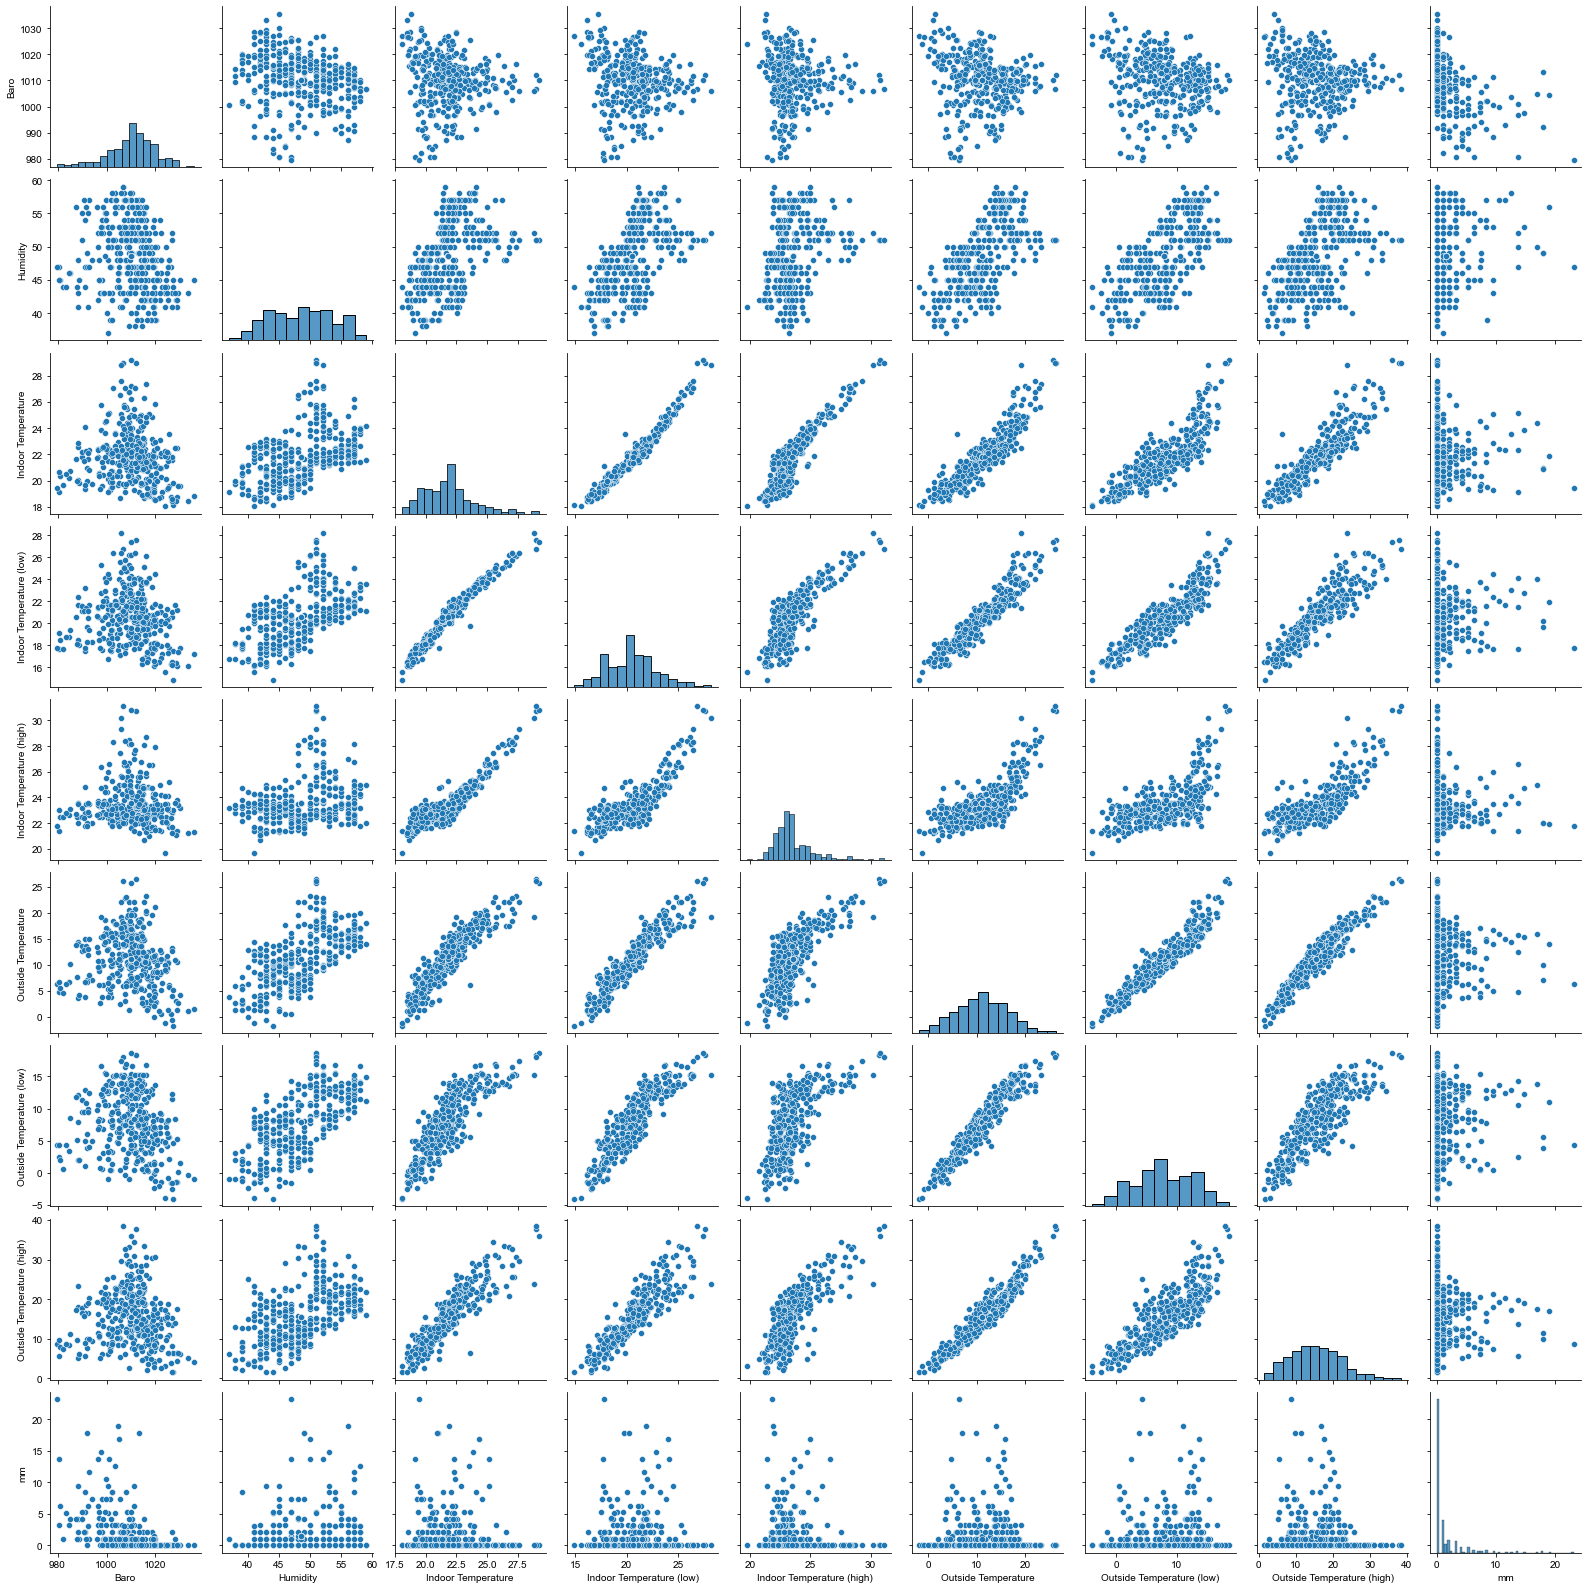

In [31]:
sns.pairplot(df)
sns.set_style("white")
#plt.savefig('Pairplot.png')
plt.show()

### Computing monthly values

- Calculate mean values of each month
- Manipulating dataframe to emulate single full year
- Single full year allows easier inspection of correlations

In [32]:
df_mean = df.drop('mm', axis=1).groupby([df.index.year, df.index.month]).apply(lambda x: x.mean())
df_mean.index.names = ['Year','Month']

df_sum = df['mm'].groupby([df.index.year, df.index.month]).apply(lambda x: x.sum())
df_sum.index.names = ['Year', 'Month']

monthly_df = pd.concat([df_mean, df_sum], axis = 1)
monthly_df

Baro   Humidity  Indoor Temperature  \
Year Month                                               
2016 10     1013.839130  51.521739           21.319565   
     11     1007.393333  48.133333           20.121333   
     12     1018.496738  45.952251           19.800254   
2017 1      1015.422581  42.483871           19.563226   
     2      1005.757143  43.178571           20.252857   
     3      1006.616093  46.339348           21.154770   
     4      1015.373333  43.700000           22.097667   
     5      1008.864516  45.096774           23.202581   
     6      1006.083333  51.533333           24.697333   
     7      1006.745161  52.887735           24.525093   
     8      1009.370641  54.537999           23.006483   
     9      1005.846667  55.166667           22.066333   
     10     1012.022222  55.777778           21.474583   

            Indoor Temperature (low)  Indoor Temperature (high)  \
Year Month                                                        
2016 10                    20.126087                  22.773913   
     11                    18.533333                  22.226667   
     12                    18.121159                  21.917213   
2017 1                     17.532258                  22.709677   
     2                     18.571429                  22.896429   
     3                     19.650191                  23.294633   
     4                     20.733333                  23.633333   
     5                     22.183871                  24.435484   
     6                     23.796667                  25.800000   
     7                     23.714707                  25.575278   
     8                     22.096884                  24.267824   
     9                     21.303333                  22.983333   
     10                    20.811111                  22.322222   

            Outside Temperature  Outside Temperature (low)  \
Year Month                                                   
2016 10               10.340870                   7.739130   
     11                6.223333                   3.696667   
     12                6.377383                   3.902117   
2017 1                 4.424839                   1.780645   
     2                 6.312500                   4.342857   
     3                 9.051899                   6.021472   
     4                10.305667                   5.986667   
     5                14.531613                  10.041935   
     6                17.601000                  13.196667   
     7                18.156129                  14.200000   
     8                15.054190                  11.573894   
     9                14.125000                  10.816667   
     10               13.234583                  10.577778   

            Outside Temperature (high)         mm  
Year Month                                         
2016 10                      13.778261  25.300000  
     11                       8.853333  90.600000  
     12                       8.762072  30.397450  
2017 1                        7.090323  35.900000  
     2                        8.914286  32.600000  
     3                       13.329814  32.148725  
     4                       15.890000   7.300000  
     5                       21.132258  43.748725  
     6                       23.566667  45.200000  
     7                       24.209677  95.900000  
     8                       20.426388  51.838527  
     9                       19.023333  71.600000  
     10                      16.877778   4.300000

### Reordering months to emulate single year

- Computing mean feature values (aside from mm of rainfall), with both instances of month 10

In [33]:
mean_month = pd.concat([monthly_df[:1],monthly_df[-1:]]).mean(axis=0).to_frame().transpose()
mean_month['Month'] = 10
mean_month = mean_month.set_index('Month')
updated_monthly_df = monthly_df.reset_index(level=0).drop(columns='Year', axis=1)
updated_monthly_df = pd.concat([updated_monthly_df.iloc[3:12], mean_month, updated_monthly_df.iloc[1:3]])
updated_monthly_df.mm.iloc[9] = pd.concat([monthly_df.mm[:1],monthly_df.mm[-1:]]).sum(axis=0)
updated_monthly_df

,Baro,Humidity,Indoor Temperature,Indoor Temperature (low),Indoor Temperature (high),Outside Temperature,Outside Temperature (low),Outside Temperature (high),mm
Month,,,,,,,,,
1,1015.422581,42.483871,19.563226,17.532258,22.709677,4.424839,1.780645,7.090323,35.900000
2,1005.757143,43.178571,20.252857,18.571429,22.896429,6.312500,4.342857,8.914286,32.600000
3,1006.616093,46.339348,21.154770,19.650191,23.294633,9.051899,6.021472,13.329814,32.148725
4,1015.373333,43.700000,22.097667,20.733333,23.633333,10.305667,5.986667,15.890000,7.300000
5,1008.864516,45.096774,23.202581,22.183871,24.435484,14.531613,10.041935,21.132258,43.748725
6,1006.083333,51.533333,24.697333,23.796667,25.800000,17.601000,13.196667,23.566667,45.200000
7,1006.745161,52.887735,24.525093,23.714707,25.575278,18.156129,14.200000,24.209677,95.900000
8,1009.370641,54.537999,23.006483,22.096884,24.267824,15.054190,11.573894,20.426388,51.838527
9,1005.846667,55.166667,22.066333,21.303333,22.983333,14.125000,10.816667,19.023333,71.600000


### Interpolation

- Interpolating 'mm' data for month 10 to fit pattern of emulated rainfall in single year

In [34]:
updated_monthly_df.mm.iloc[9] = None
updated_monthly_df.mm = updated_monthly_df.mm.interpolate(method='spline', order = 2)
updated_monthly_df

,Baro,Humidity,Indoor Temperature,Indoor Temperature (low),Indoor Temperature (high),Outside Temperature,Outside Temperature (low),Outside Temperature (high),mm
Month,,,,,,,,,
1,1015.422581,42.483871,19.563226,17.532258,22.709677,4.424839,1.780645,7.090323,35.900000
2,1005.757143,43.178571,20.252857,18.571429,22.896429,6.312500,4.342857,8.914286,32.600000
3,1006.616093,46.339348,21.154770,19.650191,23.294633,9.051899,6.021472,13.329814,32.148725
4,1015.373333,43.700000,22.097667,20.733333,23.633333,10.305667,5.986667,15.890000,7.300000
5,1008.864516,45.096774,23.202581,22.183871,24.435484,14.531613,10.041935,21.132258,43.748725
6,1006.083333,51.533333,24.697333,23.796667,25.800000,17.601000,13.196667,23.566667,45.200000
7,1006.745161,52.887735,24.525093,23.714707,25.575278,18.156129,14.200000,24.209677,95.900000
8,1009.370641,54.537999,23.006483,22.096884,24.267824,15.054190,11.573894,20.426388,51.838527
9,1005.846667,55.166667,22.066333,21.303333,22.983333,14.125000,10.816667,19.023333,71.600000


### Computing seasonal values

In [35]:
season_list = ([4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4])

seasonal_df = updated_monthly_df.copy()
seasonal_df.insert(0, 'Season', season_list)
updated_seasonal_df = seasonal_df.groupby([seasonal_df.Season]).apply(lambda x: x.mean()).drop(columns='Season')
updated_seasonal_df = updated_seasonal_df.rename(index={1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'})
updated_seasonal_df

,Baro,Humidity,Indoor Temperature,Indoor Temperature (low),Indoor Temperature (high),Outside Temperature,Outside Temperature (low),Outside Temperature (high),mm
Season,,,,,,,,,
Spring,1010.284647,45.045374,22.151673,20.855799,23.787817,11.296393,7.350025,16.784024,27.732483
Summer,1007.399712,52.986356,24.076303,23.202753,25.214367,16.937106,12.990187,22.734244,64.312842
Autumn,1008.723559,52.316586,21.194914,20.101755,22.586023,10.712020,7.890596,14.401562,86.165270
Winter,1013.225487,43.871564,19.872112,18.074949,22.507773,5.704907,3.341873,8.255560,32.965817


In [36]:
plt.rcParams['axes.grid'] = True
plt.rcParams['savefig.transparent'] = True
sns.set_context(rc = {'patch.linewidth': 0.0})

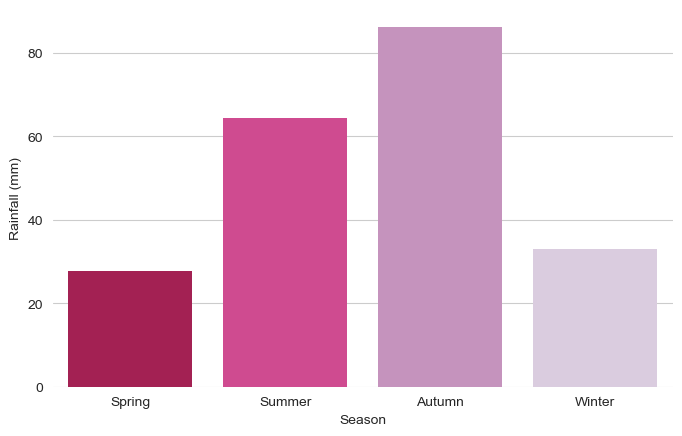

In [37]:
plt.figure(figsize=(8,5),dpi=100)
sns.set_style("whitegrid")
sns.barplot(x=updated_seasonal_df.index,y=updated_seasonal_df.mm,palette='PuRd_r')
plt.ylabel('Rainfall (mm)')
plt.box(on=None)
#plt.savefig('seasonal_rainfall.png', dpi=220)
plt.show()

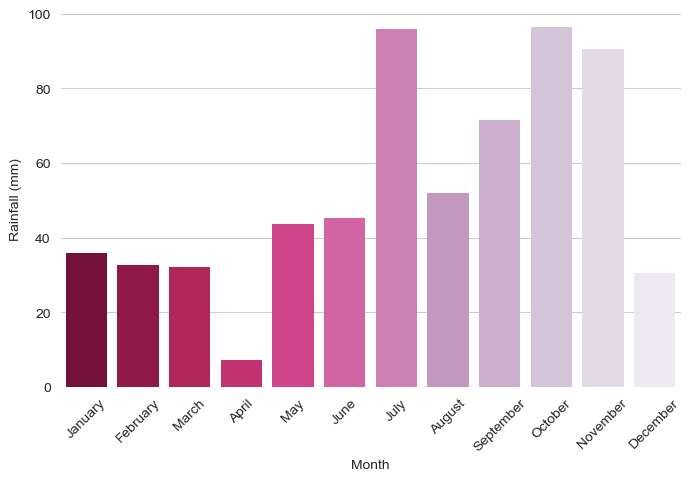

In [38]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=updated_monthly_df.index,y=updated_monthly_df.mm, palette='PuRd_r')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                                 'July', 'August', 'September', 'October', 'November', 'December'],
          rotation=45)
plt.ylabel('Rainfall (mm)')
plt.box(on=None)
#plt.savefig('Monthly_rainfall.png', dpi=220)
plt.show()

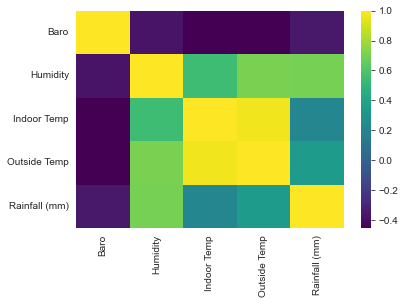

In [39]:
refined_monthly_df = updated_monthly_df.drop(columns=['Indoor Temperature (low)', 'Indoor Temperature (high)', 'Outside Temperature (low)', 'Outside Temperature (high)'], axis = 1)
refined_monthly_df
refined_monthly_corr = refined_monthly_df.corr()
labels = ['Baro', 'Humidity', 'Indoor Temp', 'Outside Temp', 'Rainfall (mm)']
sns.heatmap(refined_monthly_corr, cmap='viridis', xticklabels = labels, yticklabels = labels)
#plt.savefig('correlation_plot.png', transparent=True, bbox_inches='tight', dpi=220)
plt.show()


### Normalising Data to scale Visualisations

In [40]:
refined_monthly_df.apply(lambda x: x/x.max(), axis=0)

,Baro,Humidity,Indoor Temperature,Outside Temperature,mm
Month,,,,,
1,0.996982,0.770100,0.792119,0.243710,0.372810
2,0.987492,0.782693,0.820042,0.347679,0.338540
3,0.988335,0.839988,0.856561,0.498559,0.333854
4,0.996933,0.792145,0.894739,0.567614,0.075808
5,0.990543,0.817464,0.939477,0.800370,0.454316
6,0.987812,0.934139,1.000000,0.969425,0.469387
7,0.988462,0.958690,0.993026,1.000000,0.995890
8,0.991040,0.988604,0.931537,0.829152,0.538326
9,0.987580,1.000000,0.893470,0.777974,0.743542


In [41]:
refined_seasonal_df = updated_seasonal_df.drop(columns=['Indoor Temperature (low)', 'Indoor Temperature (high)', 
                                                        'Outside Temperature (low)', 'Outside Temperature (high)'], 
                                               axis = 1)
refined_seasonal_df
refined_seasonal_df.apply(lambda x: x/x.max(), axis=0)

,Baro,Humidity,Indoor Temperature,Outside Temperature,mm
Season,,,,,
Spring,0.997098,0.850132,0.920061,0.666961,0.321852
Summer,0.994250,1.000000,1.000000,1.000000,0.746389
Autumn,0.995557,0.987360,0.880323,0.632459,1.000000
Winter,1.000000,0.827979,0.825381,0.336829,0.382588
